In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Cust_Segmentation.csv')
data.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [4]:
import numpy as np

In [5]:
np.corrcoef(data['Age'],data['Income'])

array([[1.        , 0.47621808],
       [0.47621808, 1.        ]])

In [13]:
data['Years_Employed'] = data['Years Employed']

In [15]:
age = pd.cut(data['Age'],[0,30,60])
pd.crosstab(age, data.Edu, values=data.Income, aggfunc='mean')

Edu,1,2,3,4,5
Age,,,,,
"(0, 30]",23.618056,29.791209,40.129032,35.350000,NaN
"(30, 60]",48.683544,57.798611,73.157143,75.862069,116.6


<Axes: xlabel='Edu', ylabel='Age'>

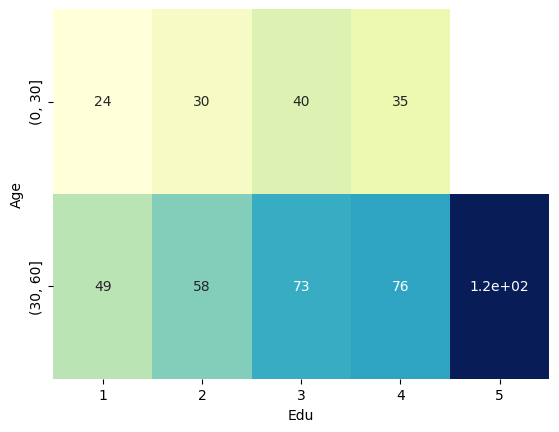

In [29]:
import seaborn as sns

sns.heatmap(pd.crosstab(age, data.Edu, values=data.Income, aggfunc='mean')
            , cmap="YlGnBu", annot=True, cbar=False)

In [18]:
data.groupby(age)[['Income']].mean()

,Income
Age,
"(0, 30]",28.192308
"(30, 60]",56.047872


In [19]:
data.groupby([age,'Edu'])['Income'].aggregate('mean').unstack()

Edu,1,2,3,4,5
Age,,,,,
"(0, 30]",23.618056,29.791209,40.129032,35.350000,NaN
"(30, 60]",48.683544,57.798611,73.157143,75.862069,116.6


In [24]:
data.pivot_table('Income', [age], ['Edu'])

Edu,1,2,3,4,5
Age,,,,,
"(0, 30]",23.618056,29.791209,40.129032,35.350000,NaN
"(30, 60]",48.683544,57.798611,73.157143,75.862069,116.6


In [27]:
data.pivot_table('Income',[age,'Years_Employed'],['Edu'])

Edu                               1           2           3           4      5
Age      Years_Employed                                                       
(0, 30]  0                17.500000   23.125000   31.555556   31.363636    NaN
         1                19.086957   22.181818   27.500000   48.600000    NaN
         2                18.800000   26.375000   25.800000   29.666667    NaN
         3                20.000000   27.818182   44.800000         NaN    NaN
         4                21.550000   24.666667   40.000000         NaN    NaN
         5                25.250000   32.222222   57.750000         NaN    NaN
         6                30.250000   34.666667   36.500000         NaN    NaN
         7                23.888889   32.000000   73.500000   30.000000    NaN
         8                25.900000   36.600000   61.000000         NaN    NaN
         9                27.571429   37.333333         NaN         NaN    NaN
         10               30.750000   42.333333         NaN         NaN    NaN
         11               32.714286         NaN         NaN         NaN    NaN
         12               40.750000   83.000000         NaN         NaN    NaN
         13               34.500000         NaN         NaN         NaN    NaN
(30, 60] 0                25.454545   26.285714   32.750000         NaN    NaN
         1                23.300000   23.000000   20.000000   29.500000    NaN
         2                27.100000   29.600000   31.000000   29.000000    NaN
         3                25.166667   34.000000   41.000000   45.000000    NaN
         4                25.058824   35.833333   52.000000   25.500000    NaN
         5                29.818182   34.571429   65.857143   76.500000   20.0
         6                31.333333   39.666667   38.000000   27.000000  190.0
         7                31.750000   51.428571   49.750000   67.750000    NaN
         8                32.250000   47.285714  114.000000   32.000000    NaN
         9                41.058824   43.928571   55.666667   35.666667  123.5
         10               41.750000   50.833333   54.000000   84.000000    NaN
         11               41.533333   61.125000   41.500000         NaN    NaN
         12               42.625000   65.090909   68.600000         NaN    NaN
         13               41.529412   73.333333   57.800000  180.000000    NaN
         14               50.545455   64.333333         NaN   51.500000    NaN
         15               55.384615   77.000000   63.000000  106.000000  126.0
         16               57.000000   68.166667  127.888889         NaN    NaN
         17               57.111111   85.000000  135.000000         NaN    NaN
         18               57.200000   53.500000  107.500000  262.000000    NaN
         19               60.666667  113.500000         NaN         NaN    NaN
         20               63.166667  101.000000         NaN         NaN    NaN
         21               61.250000  119.400000  118.000000         NaN    NaN
         22               88.125000  104.500000   99.000000         NaN    NaN
         23               73.800000         NaN  115.000000         NaN    NaN
         24              120.400000         NaN         NaN         NaN    NaN
         25              142.000000         NaN   94.000000         NaN    NaN
         26              100.000000         NaN         NaN         NaN    NaN
         27              113.000000  136.500000         NaN         NaN    NaN
         28               70.000000         NaN         NaN         NaN    NaN
         29              149.000000         NaN         NaN         NaN    NaN
         30              125.500000  148.000000         NaN         NaN    NaN
         31              194.500000  249.000000         NaN         NaN    NaN
         33              231.500000         NaN         NaN         NaN    NaN

In [30]:
employed = pd.qcut(data['Years_Employed'],2)

In [31]:
data.pivot_table('Income',[age,employed],['Edu'], aggfunc='mean')

Edu                              1          2          3           4   
Age      Years_Employed                                                
(0, 30]  (-0.001, 7.0]   21.150943  27.217949  39.433333   35.350000  \
         (7.0, 33.0]     30.500000  45.230769  61.000000         NaN   
(30, 60] (-0.001, 7.0]   27.733333  35.075472  46.423077   46.266667   
         (7.0, 33.0]     59.109005  71.032967  88.954545  107.571429   

Edu                               5  
Age      Years_Employed              
(0, 30]  (-0.001, 7.0]          NaN  
         (7.0, 33.0]            NaN  
(30, 60] (-0.001, 7.0]   105.000000  
         (7.0, 33.0]     124.333333

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Edu', ylabel='Age-Years_Employed'>

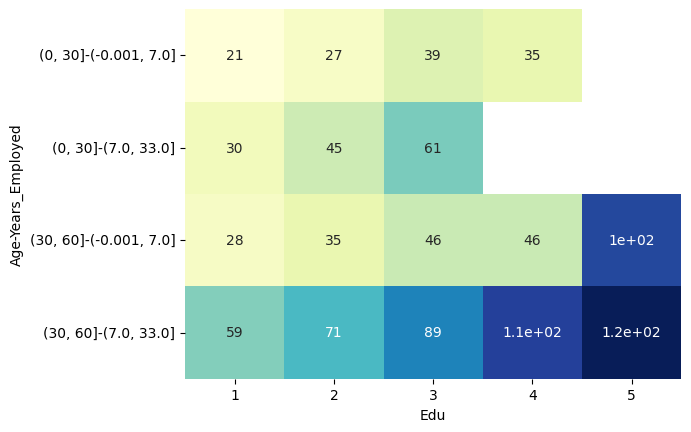

In [36]:
sns.heatmap(data.pivot_table('Income',[age,employed],['Edu'], aggfunc='mean'), cmap="YlGnBu", annot=True, cbar=False)